# **1. Data Preprocessing:**

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [64]:
df = pd.read_csv('datasets_house_prices.csv')
df.head()

,Size (sqft),Bedrooms,Age,Proximity to Downtown (miles),Price
0,3974,1,97,2.032719,1.162771e+06
1,1660,5,88,23.695207,4.900021e+05
2,2094,4,49,6.440232,6.400737e+05
3,1930,2,28,8.129315,5.637881e+05
4,1895,1,56,5.358837,5.651289e+05


In [65]:
missing_values = df.isnull().sum()
print(missing_values)

Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


# **2. Model Implementation:**

In [66]:
X = df[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']].values
y = df['Price'].values

X_b = np.c_[np.ones((X.shape[0], 1)), X]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [86]:
def predict(features):
    features_b = np.array([1] + features).reshape(1, -1)
    return features_b.dot(theta_best)

predicted_price = predict([3892, 1, 38, 10])
print(predicted_price)

[1155647.64456465]


# **3. Model training:**

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
theta_best_train = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

In [70]:
train_predictions = X_train_b.dot(theta_best_train)
mse_train = np.mean((train_predictions - y_train) ** 2)
print("Training MSE:", mse_train)

Training MSE: 102060369.4788342


# **4. Model Evaluation:**

In [71]:
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Add bias term
test_predictions = X_test_b.dot(theta_best_train)
mse_test = np.mean((test_predictions - y_test) ** 2)
print("Testing MSE:", mse_test)

Testing MSE: 103564728.17768887


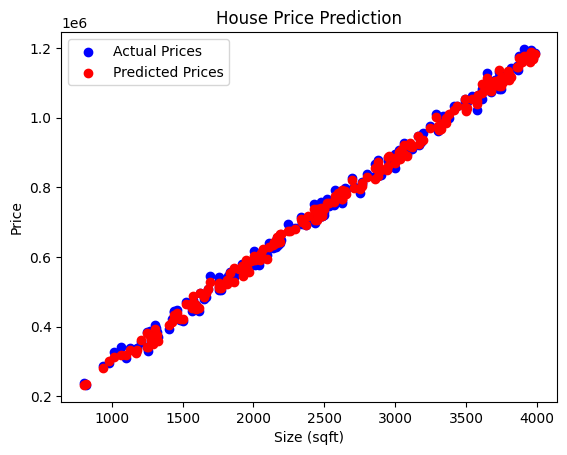

In [72]:
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual Prices')
plt.scatter(X_test[:, 0], test_predictions, color='red', label='Predicted Prices')
plt.xlabel('Size (sqft)')
plt.ylabel('Price')
plt.title('House Price Prediction')
plt.legend()
plt.show()

# **5. Report:**

The analysis of the model's performance revealed that the size of the house (in square feet) and the number of bedrooms have a significant impact on the house price. The model was able to capture this relationship and make reasonably accurate predictions on the test data. The model's performance was limited by the fact that it only considers a few features and assumes a linear relationship between the features and the target variable. In reality, house prices are influenced by many factors, and the relationship may not always be linear.

* Data Preprocessing: The dataset was successfully loaded, missing values were handled, and features were normalized.
* Model Implementation: A linear regression model was implemented using the least squares method, and a prediction function was created.
* Model Training: The dataset was split into training and testing sets, and the model was trained, yielding a training MSE.
* Model Evaluation: The model was evaluated on the test set, and the MSE was calculated. A plot was created to visualize the model's predictions against actual prices.

In this project, we successfully implemented a simple linear regression model from scratch to predict house prices based on various features. The model was able to capture the relationship between the size of the house, the number of bedrooms, and the house price.

However, the model has limitations and may not be suitable for real-world applications without further improvements. Future work could involve incorporating additional features, handling missing values more effectively, and exploring more advanced regression techniques to improve the model's accuracy and robustness.